In [11]:
# Baseline Regression Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

preprocessed_df = pd.read_csv("DBtrainrides_baseline_data.csv")
# Define the target and features for the regression tree
target_column = 'arrival_delay_m'  # Specify the target column

# Drop all rows with canceled == True
# Predicting arrival_delay_m
# Drop line, zip, arrival_change, departure_change, departure_delay_m, info, transformed_info_message, canceled
# Filter the DataFrame to only include the necessary columns

df_features = preprocessed_df.loc[preprocessed_df["canceled"] != True]
df_features = df_features.drop(["Unnamed: 0","line", "zip", "arrival_change", "departure_change", "departure_delay_m", "info", "transformed_info_message", "canceled"], axis=1)
df_target = preprocessed_df[target_column]
df_features

C:\Users\rapha\AppData\Local\Temp\ipykernel_16972\2485273529.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  preprocessed_df = pd.read_csv("DBtrainrides_baseline_data.csv")


,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,last_station,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,info_present
57,1573967790757085557,2407072312,1,8000001,stolberg(rheinl)hbf gl.44,NaN,NaN,NaN,NaN,NaN,NaN,False
58,1573967790757085557,2407072312,2,8000001,eschweiler-st.jöris,8001917.0,NaN,NaN,NaN,NaN,NaN,False
59,1573967790757085557,2407072312,3,8000001,alsdorf poststraße,8000510.0,NaN,NaN,NaN,NaN,NaN,False
60,1573967790757085557,2407072312,4,8000001,alsdorf-mariadorf,8000527.0,NaN,NaN,NaN,NaN,NaN,False
61,1573967790757085557,2407072312,5,8000001,alsdorf-kellersberg,8000521.0,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2811475,6234297817509604666,2407112012,7,8098360,stockstadt(rhein),8005740.0,NaN,NaN,NaN,NaN,NaN,False
2811476,6234297817509604666,2407112012,8,8098360,biebesheim,8000951.0,8.473978,49.781977,2024-07-11 20:45:00,2024-07-11 20:45:00,0.0,True
2811477,6234297817509604666,2407112012,9,8098360,gernsheim,8002249.0,NaN,NaN,NaN,NaN,NaN,False
2811478,6234297817509604666,2407112012,10,8098360,groß-rohrheim,NaN,NaN,NaN,NaN,NaN,NaN,False


In [12]:
df_features.groupby(["ID_Base"]).head(20)


,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,last_station,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,info_present
57,1573967790757085557,2407072312,1,8000001,stolberg(rheinl)hbf gl.44,NaN,NaN,NaN,NaN,NaN,NaN,False
58,1573967790757085557,2407072312,2,8000001,eschweiler-st.jöris,8001917.0,NaN,NaN,NaN,NaN,NaN,False
59,1573967790757085557,2407072312,3,8000001,alsdorf poststraße,8000510.0,NaN,NaN,NaN,NaN,NaN,False
60,1573967790757085557,2407072312,4,8000001,alsdorf-mariadorf,8000527.0,NaN,NaN,NaN,NaN,NaN,False
61,1573967790757085557,2407072312,5,8000001,alsdorf-kellersberg,8000521.0,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2811452,3075541027025221171,2407100511,3,8098360,mannheim-waldhof,8003848.0,8.482603,49.525661,2024-07-10 05:19:00,2024-07-10 05:20:00,0.0,True
2811453,3075541027025221171,2407100511,4,8098360,lampertheim,8003503.0,8.478489,49.598215,2024-07-10 05:28:00,2024-07-10 05:29:00,0.0,True
2811455,3075541027025221171,2407120511,2,8098360,mannheim-käfertal,8003843.0,NaN,NaN,NaN,NaN,NaN,False
2811456,3075541027025221171,2407120511,3,8098360,mannheim-waldhof,8003848.0,8.482603,49.525661,2024-07-12 05:19:00,2024-07-12 05:20:00,0.0,False


In [13]:
# Additional Preprocessing: Drop all Base ID's which have any NaN values except starting position
# Need  to interpolate/restore data

# Step 1: Identify the rows to drop
rows_to_drop = set()

# Step 2: Check each unique value in column A
for value in df_features['ID_Base'].unique():
    # Get rows that correspond to the current value
    rows_with_value = df_features[(df_features['ID_Base'] == value) & (df_features["stop_number"] != 1)]

    # Step 3: Check if any of these rows have NaN in any column other than A
    if rows_with_value.drop(columns='ID_Base').isnull().values.any():
        # If so, add the index of all rows with that value to rows_to_drop
        rows_to_drop.add(value)

# Step 4: Drop the identified rows
cleaned_df = df_features[df_features["ID_Base"].isin(rows_to_drop) == False]
cleaned_df

,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,last_station,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,info_present
12190,-4723343422636309065,2407130634,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-13 06:45:00,2024-07-13 06:46:00,0.0,False
12192,-4723343422636309065,2407140634,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-14 06:45:00,2024-07-14 06:46:00,0.0,False
12227,-6627749385339055415,2407081034,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-08 10:45:00,2024-07-08 10:46:00,0.0,True
12229,-6627749385339055415,2407091034,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-09 10:45:00,2024-07-09 10:46:00,0.0,False
12231,-6627749385339055415,2407111034,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-11 10:45:00,2024-07-11 10:46:00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2792541,1743114437240394004,2407120110,1,8089131,berlin gesundbrunnen(s),8089015.0,NaN,NaN,NaN,NaN,NaN,False
2792542,214163735824043521,2407120010,1,8089131,berlin gesundbrunnen(s),8089015.0,NaN,NaN,NaN,NaN,NaN,False
2792545,3104007004010608862,2407100231,2,8089131,berlin westhafen,8089116.0,13.344253,52.536250,2024-07-10 02:32:00,2024-07-10 02:33:00,0.0,False
2792547,3104007004010608862,2407110231,2,8089131,berlin westhafen,8089116.0,13.344253,52.536250,2024-07-11 02:32:00,2024-07-11 02:33:00,0.0,False


In [14]:
from sklearn.preprocessing import LabelEncoder
# Step 2: Encode categorical data
# Encode 'last_station' using LabelEncoder
label_encoder = LabelEncoder()
cleaned_df['last_station_encoded'] = label_encoder.fit_transform(cleaned_df['last_station'])

# Convert boolean 'info_present' to 0 and 1
cleaned_df['info_present'] = cleaned_df['info_present'].astype(int)

# Step 3: Convert datetime columns
cleaned_df['arrival_plan'] = pd.to_datetime(cleaned_df['arrival_plan'])
cleaned_df['departure_plan'] = pd.to_datetime(cleaned_df['departure_plan'])
cleaned_df['arrival_year'] = cleaned_df['arrival_plan'].dt.year
cleaned_df['arrival_month'] = cleaned_df['arrival_plan'].dt.month
cleaned_df['arrival_day'] = cleaned_df['arrival_plan'].dt.day
cleaned_df['arrival_hour'] = cleaned_df['arrival_plan'].dt.hour
cleaned_df['arrival_minute'] = cleaned_df['arrival_plan'].dt.minute

# Extract datetime components for departure_plan
cleaned_df['departure_year'] = cleaned_df['departure_plan'].dt.year
cleaned_df['departure_month'] = cleaned_df['departure_plan'].dt.month
cleaned_df['departure_day'] = cleaned_df['departure_plan'].dt.day
cleaned_df['departure_hour'] = cleaned_df['departure_plan'].dt.hour
cleaned_df['departure_minute'] = cleaned_df['departure_plan'].dt.minute

# Get Targets
cleaned_target = cleaned_df["arrival_delay_m"]
cleaned_features = cleaned_df.drop(columns="arrival_delay_m")

# Drop preprocessed columns
cleaned_features.drop(columns=['last_station','arrival_plan','departure_plan'],inplace=True)
cleaned_target

C:\Users\rapha\AppData\Local\Temp\ipykernel_16972\3760448085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['last_station_encoded'] = label_encoder.fit_transform(cleaned_df['last_station'])
C:\Users\rapha\AppData\Local\Temp\ipykernel_16972\3760448085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['info_present'] = cleaned_df['info_present'].astype(int)
C:\Users\rapha\AppData\Local\Temp\ipykernel_16972\3760448085.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

12190      0.0
12192      0.0
12227      0.0
12229      0.0
12231      0.0
          ... 
2792541    NaN
2792542    NaN
2792545    0.0
2792547    0.0
2810789    0.0
Name: arrival_delay_m, Length: 92372, dtype: float64

In [21]:
# Replace naN values in targets with 0 because they are all coming from the first stop of a train ride (others are filtered out above):
cleaned_target = cleaned_target.fillna(0)
cleaned_features

,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,IBNR,long,lat,info_present,last_station_encoded,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_minute,departure_year,departure_month,departure_day,departure_hour,departure_minute
12190,-4723343422636309065,2407130634,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,13.0,6.0,45.0,2024.0,7.0,13.0,6.0,46.0
12192,-4723343422636309065,2407140634,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,14.0,6.0,45.0,2024.0,7.0,14.0,6.0,46.0
12227,-6627749385339055415,2407081034,2,8000014,8004965.0,9.606100,47.784481,1,834,2024.0,7.0,8.0,10.0,45.0,2024.0,7.0,8.0,10.0,46.0
12229,-6627749385339055415,2407091034,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,9.0,10.0,45.0,2024.0,7.0,9.0,10.0,46.0
12231,-6627749385339055415,2407111034,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,11.0,10.0,45.0,2024.0,7.0,11.0,10.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792541,1743114437240394004,2407120110,1,8089131,8089015.0,NaN,NaN,0,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792542,214163735824043521,2407120010,1,8089131,8089015.0,NaN,NaN,0,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792545,3104007004010608862,2407100231,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,10.0,2.0,32.0,2024.0,7.0,10.0,2.0,33.0
2792547,3104007004010608862,2407110231,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,11.0,2.0,32.0,2024.0,7.0,11.0,2.0,33.0


In [23]:
# Randomly select 1000 samples for training and 100 for testing
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(cleaned_features, cleaned_target, test_size=0.2, random_state=42)

# Initialize the regression tree model
regression_tree = DecisionTreeRegressor()

# Fit the model on the training data
regression_tree.fit(df_features_train, df_target_train)

# Predict on the test data
test_predictions = regression_tree.predict(df_features_test)

# Calculate Mean Squared Error as a performance metric
mse = mean_squared_error(df_target_test, test_predictions)
print("Mean Squared Error:", mse)

# Mean Squared Error: 14.935798910219793 ~ +/- 3.74min away from the actual delay

Mean Squared Error: 14.935798910219793


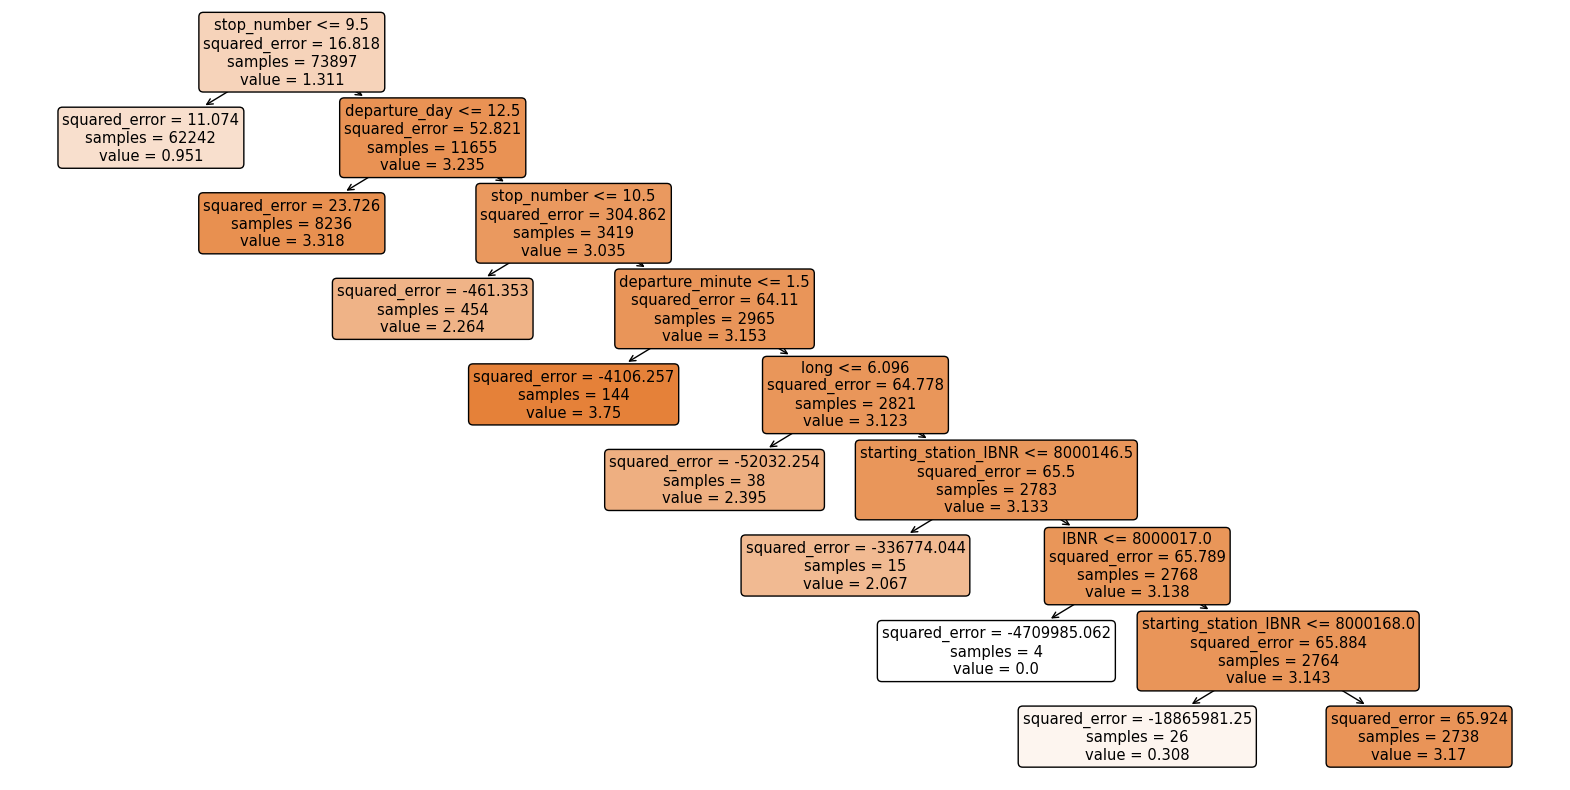

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Assuming 'regressor' is your trained DecisionTreeRegressor
plt.figure(figsize=(20, 10))  # Adjust size as needed for readability
plot_tree(regression_tree, feature_names=cleaned_features.columns, filled=True, rounded=True)
plt.show()


In [4]:
"""# Step 1: Identify the rows to drop
rows_to_drop = set()

# Step 2: Check each unique value in column A
for value in df_features['ID_Base'].unique():
    # Get rows that correspond to the current value
    rows_with_value = df_features[df_features['ID_Base'] == value]

    # Step 3: Check if any of these rows have NaN in any column other than A
    if rows_with_value.drop(columns='ID_Base').isnull().values.any():
        # If so, add the index of all rows with that value to rows_to_drop
        rows_to_drop.update(rows_with_value.index)

# Step 4: Drop the identified rows
cleaned_df = df_features.drop(index=rows_to_drop)
cleaned_df"""

KeyboardInterrupt: 

In [ ]:
#cleaned_df.groupby(["ID_Base"])["arrival_delay_m"].agg(lambda x: list(x.unique())).reset_index()